# Nodes

In [4]:
import tensorflow as tf

In [5]:
const_1 = tf.constant(value=[5.0],
                      dtype=tf.float32,
                      shape=(1,),
                      name='const_1',
                      verify_shape=True)
print(const_1)

Tensor("const_1:0", shape=(1,), dtype=float32)


In [7]:
var_1 = tf.Variable(initial_value=[1.0], #if we pass in a value here a lot of the variables will be obvious
                   trainable=True,
                   collections=None,
                   validate_shape=True,
                   caching_device=None,
                   name='var_1',
                   variable_def=None,
                   dtype=tf.float32,
                   expected_shape=(1,),
                   import_scope=None)
print(var_1)

<tf.Variable 'var_1_1:0' shape=(1,) dtype=float32_ref>


In [8]:
placeholder_1 = tf.placeholder(dtype=tf.float32,
                              shape=(1,),
                              name='placeholder_1')
print(placeholder_1)

Tensor("placeholder_1:0", shape=(1,), dtype=float32)


## Sessions
- Tensorflow sessions allow us to run computational graphs
- Use this to train, test or use graph
- Pass in appropriate data sets and start and end nodes

In [9]:
session = tf.Session()

In [10]:
print(session.run(const_1))

[5.]


In [11]:
init = tf.global_variables_initializer()
session.run(init)
print(session.run(var_1))

[1.]


In [12]:
print(session.run([const_1, var_1]))

[array([5.], dtype=float32), array([1.], dtype=float32)]


In [14]:
print(session.run(placeholder_1, feed_dict={placeholder_1:[11.0]}))

[11.]


the shape is very important when using feed_dict becasue if the input does not match the shape you will get the error below

In [16]:
print(session.run(placeholder_1, feed_dict={placeholder_1:[11.0, 4.1, 5.4]}))

ValueError: Cannot feed value of shape (3,) for Tensor 'placeholder_1:0', which has shape '(1,)'

## Operations

In [20]:
result = const_1 + 5
print(result)
print(session.run(result))

Tensor("add_1:0", shape=(1,), dtype=float32)
[10.]


In [18]:
result = tf.add(const_1, 5, name='add_node')
print(result)

Tensor("add_node:0", shape=(1,), dtype=float32)


In [19]:
print(session.run(result))

[10.]


In [22]:
result = placeholder_1 + 10
print(session.run(result, feed_dict={placeholder_1: [10]}))

[20.]


## Linear Regression
- y = mx + b
- We have a set of numbers and are trying to draw a line of best fit
- Line of best fit is closest on average to all of the points on the graph
- Simple with machine learning as this is essentially loss which a model is trying to eliminate

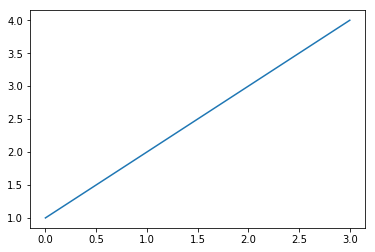

In [23]:
import matplotlib.pyplot as plt

x_train = [0.0, 1.0, 2.0, 3.0]
y_train = [1.0, 2.0, 3.0, 4.0]

plt.plot(x_train, y_train)
plt.show()

In [25]:
# y = m*x + b
m = tf.Variable(initial_value=[0.5], dtype=tf.float32)
b = tf.Variable(initial_value=[0.5], dtype=tf.float32)

In [26]:
x_input = tf.placeholder(dtype=tf.float32)
y_input = tf.placeholder(dtype=tf.float32)

In [27]:
y_output = tf.add(tf.multiply(m, x_input), b)

In [28]:
loss = tf.reduce_sum(input_tensor=tf.square(x=y_output - y_input))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.01) # learning rate is the amount by which we are changing the variable values upon each iteration
train_step = optimiser.minimize(loss=loss)

In [31]:
session = tf.Session()
session.run(tf.global_variables_initializer())

# more epochs and lower learning_rate gives higher accuracy at the trade off of it taking longer to train

print(session.run(loss, feed_dict={x_input:x_train, y_input:y_train}))
for _ in range(1000):
    session.run(train_step, feed_dict={x_input:x_train, y_input:y_train})
    
print(session.run([loss, m, b], feed_dict={x_input:x_train, y_input:y_train}))    

7.5
[4.465761e-12, array([1.000001], dtype=float32), array([0.9999983], dtype=float32)]


In [32]:
model_output = session.run(y_output, feed_dict={x_input: x_train})

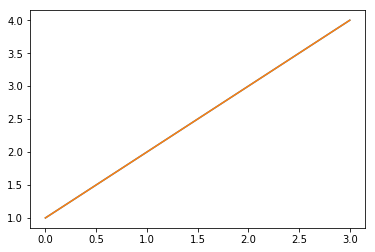

In [34]:
plt.plot(x_train, model_output)
plt.plot(x_train, y_train)
plt.show()